In [12]:
import os, glob, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import zscore

import numpy as np
from scipy import interpolate

def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B


### setup vars and subjs

In [53]:
video_onset_times = (np.arange(39,1200,39))
print(video_onset_times)

folders = glob.glob("../data/00_raw_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])

print(len(subjs))
subjs[:3]

[  39   78  117  156  195  234  273  312  351  390  429  468  507  546
  585  624  663  702  741  780  819  858  897  936  975 1014 1053 1092
 1131 1170]
59


['sub001', 'sub002', 'sub003']

### loop over subjects, videos

In [57]:
for curr_sub in range(len(subjs)):

    print(subjs[curr_sub])

    # assemble filepaths for the subjects
    curr_sub_eye_file      = '../data/00_raw_data/' + subjs[curr_sub] + '/'+ subjs[curr_sub] +'_tracking_data_trial_1.txt'

    #read in fixation information
    eye_df = pd.read_csv(curr_sub_eye_file, sep = '\t')
    eye_df = eye_df.drop(['Unnamed: 9'], axis=1)
    eye_df.head()
    
    
    curr_sub_video_file      = '../data/00_raw_data/' + subjs[curr_sub] + '/'+ subjs[curr_sub] +'_videolist.csv'
    video_file_names = pd.read_csv(curr_sub_video_file)

    #video started: C:/Users/CAS.CARISMA/Desktop/VR-Video/resources/stimuli/commercial_cookies_30s_100.mp4
    #select fixations and count them
    #contain_values = eye_df[eye_df['flag    '].str.contains('video started')]
    #contain_values.head()

    #for row in contain_values.itertuples():
    for curr_video in range(30):

        #print(curr_video)
        curr_video_name = video_file_names['filename'][curr_video]
        #print(curr_video_name)

        #curr_video_onset  = contain_values['seconds '].iloc[0]
        curr_video_onset  = eye_df.iloc[(eye_df['seconds '] - video_onset_times[curr_video]).abs().argsort()[0],:]['seconds ']
        curr_video_offset = curr_video_onset + 39

        #current_video_name = contain_values['flag    '].iloc[0].replace('video started: C:/Users/CAS.CARISMA/Desktop/VR-Video/resources/stimuli/', '')[:-4]
        #print(current_video_name)
        current_video_name = curr_video_name[:-4] #+ str(curr_video)

        out_path = '../data/01_parsed_video_data/' + subjs[curr_sub] + '/'
        out_file_name          = out_path  + current_video_name + '.csv'  #

        isExist = os.path.exists(out_path)
        if not isExist:
           os.makedirs(out_path)

        #eye_df[eye_df['seconds '] == contain_values['seconds '].iloc[0]]

        curr_video_df = eye_df[ eye_df['seconds '].between(curr_video_onset, curr_video_offset)]
        #curr_video_df['pupil diameter'].plot()

        curr_video_df['seconds '] = curr_video_df['seconds '] - curr_video_df['seconds '].iloc[0]

        curr_video_df['pupil diameter'].replace(0, np.nan, inplace=True)


        curr_video_df['time'] = pd.to_datetime(curr_video_df['seconds '], unit='s')#.apply(lambda x: x.time())
        #curr_video_df
        curr_video_df = curr_video_df.set_index('time')
        curr_video_df

        curr_video_df = curr_video_df[~curr_video_df.index.duplicated(keep='first')]

        curr_video_df_resampled = curr_video_df.resample('50ms').ffill()

        curr_video_df_resampled['seconds_resampled'] = curr_video_df_resampled.index
        curr_video_df_resampled['seconds_resampled'] = curr_video_df_resampled['seconds_resampled'] - curr_video_df_resampled['seconds_resampled'][0]

        curr_video_df_resampled['time'] = curr_video_df_resampled['seconds_resampled'].dt.total_seconds()
        curr_video_df_resampled.drop(columns = ['seconds_resampled', 'seconds ', 'position x', 'position y', 'position z' ], inplace =True)
        curr_video_df_resampled.reset_index(drop=True, inplace=True)

        order = [5,0,1,2,3,4] # setting column's order
        curr_video_df_resampled = curr_video_df_resampled[[curr_video_df_resampled.columns[i] for i in order]]


        curr_video_df_resampled.to_csv(out_file_name, index=False)
        del curr_video_df_resampled, curr_video_df
    del eye_df


sub001
sub002
sub003
sub004
sub005
sub006
sub007
sub008
sub009
sub010
sub011
sub012
sub013
sub014
sub015
sub016
sub017
sub018
sub019
sub020
sub021
sub022
sub023
sub024
sub025
sub026
sub027
sub028
sub029
sub030
sub031
sub032
sub033
sub034
sub035
sub037
sub038
sub039
sub040
sub041
sub042
sub043
sub044
sub045
sub046
sub047
sub048
sub049
sub050
sub051
sub052
sub053
sub054
sub055
sub056
sub057
sub058
sub059
sub060


In [58]:
eye_df

,seconds,point x,point y,point z,position x,position y,position z,pupil diameter,flag
0,1.05,0.09,1.61,3.40,0.12,1.62,0.09,4.58,gaze started: p_3_2
1,1.22,0.44,2.16,3.40,0.12,1.63,0.10,4.75,-
2,1.28,0.39,2.19,3.40,0.12,1.63,0.09,4.78,gaze started: p_2_3
3,1.33,0.40,2.19,3.40,0.12,1.63,0.09,4.76,-
4,1.38,0.41,2.23,3.40,0.12,1.63,0.09,4.77,-
...,...,...,...,...,...,...,...,...,...
27360,1259.67,-0.07,0.98,3.40,0.14,1.60,0.11,5.49,-
27361,1259.72,-0.05,1.00,3.40,0.14,1.60,0.11,5.47,-
27362,1259.77,-0.03,1.00,3.40,0.14,1.60,0.11,5.47,-
27363,1259.82,-0.03,1.01,3.40,0.14,1.60,0.11,5.52,gaze fixated: p_4_2


In [5]:
len(subjs)

7

In [19]:
filestoread

[]

In [22]:
all_sub_data = []

for curr_sub in range(7):#len(subjs)):
    print(subjs[curr_sub])
    search_path = "../data/01_parsed_video_data/" +  subjs[curr_sub] + "/*"
    filestoread = glob.glob(search_path)
    filestoread.sort()
    files = []
    for f in filestoread:
        files.append(f)

    df_list = []
    for i in range(30):
     df_list.append(pd.read_csv(files[i])['pupil diameter'].values[:765])
    all_sub_data.append(np.vstack(df_list))





sub001
sub002
sub003
sub004
sub005
sub006
sub007


In [23]:
all_sub_videos_res = np.asarray(all_sub_data)
all_sub_videos_res.shape

(7, 30, 765)

In [24]:
zed.shape

NameError: name 'zed' is not defined

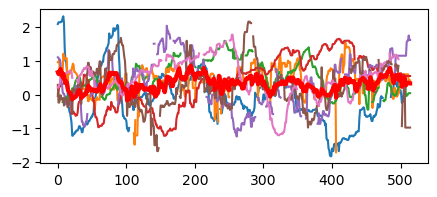

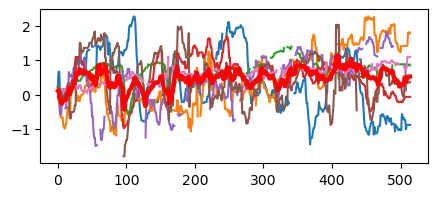

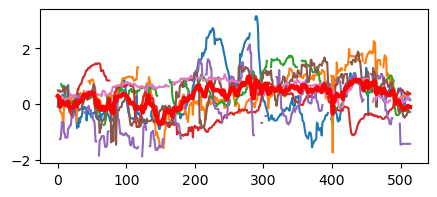

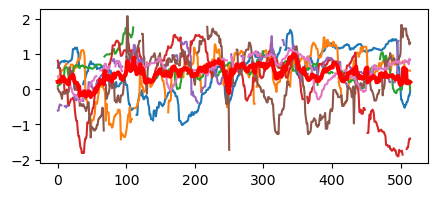

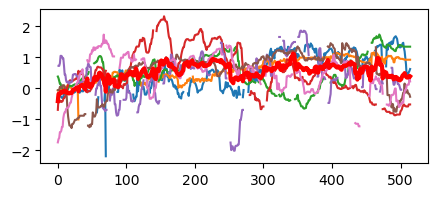

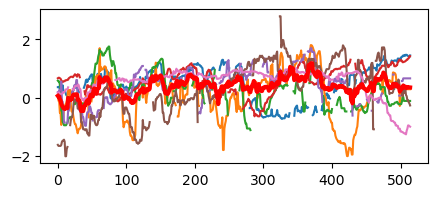

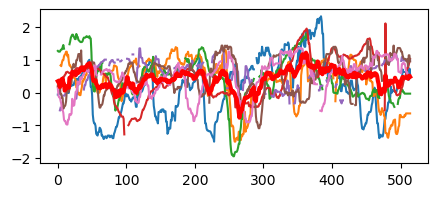

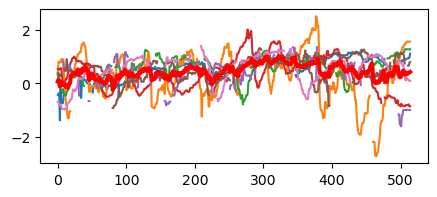

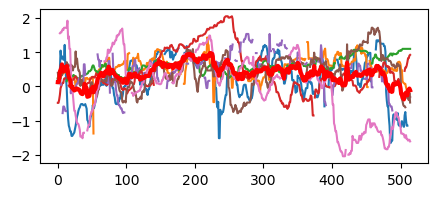

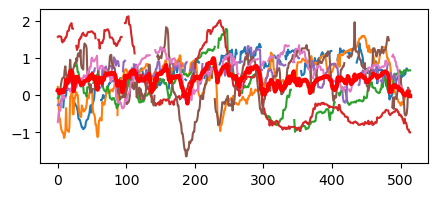

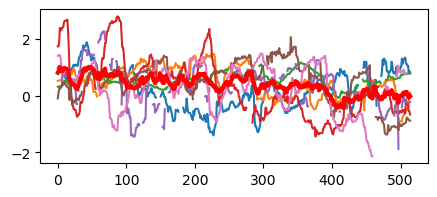

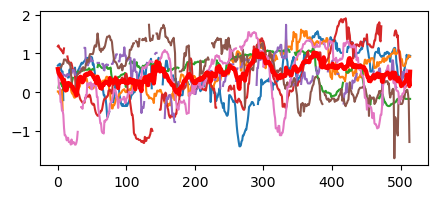

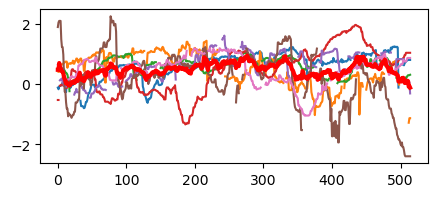

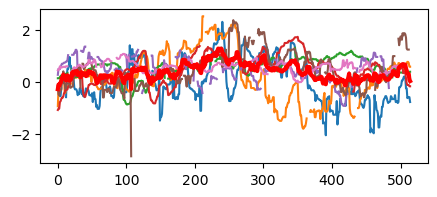

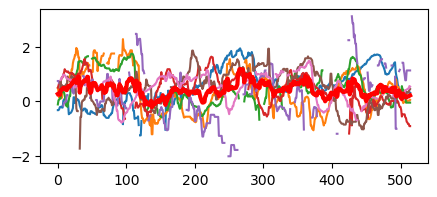

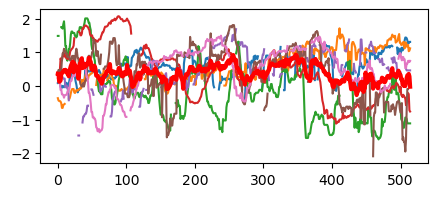

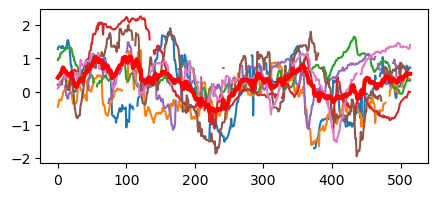

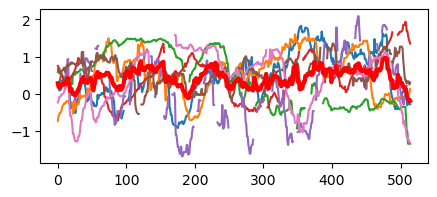

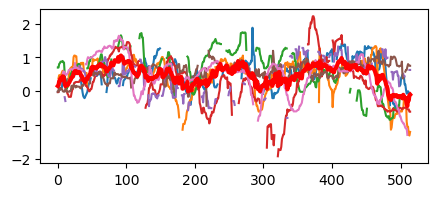

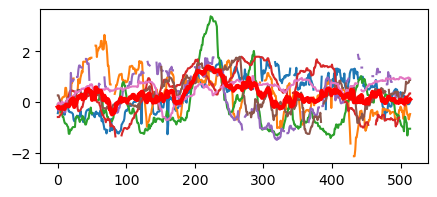

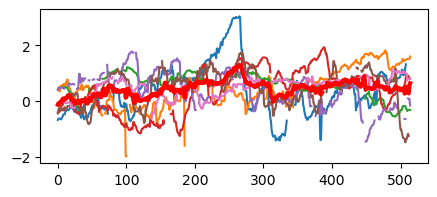

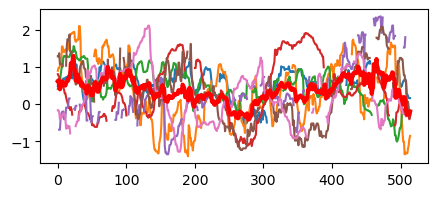

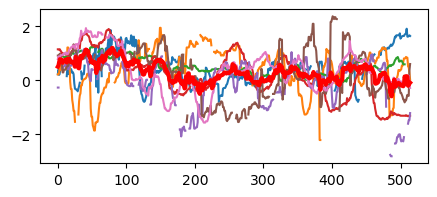

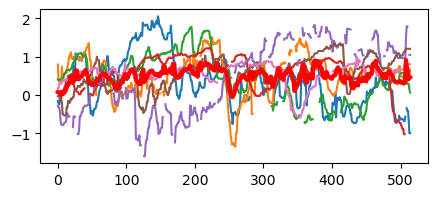

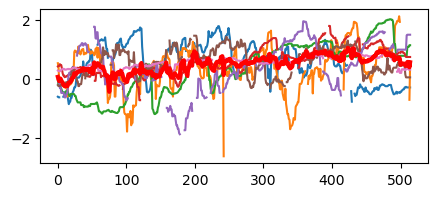

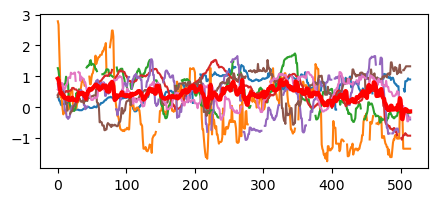

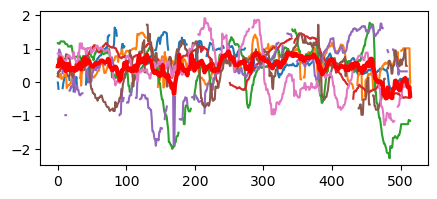

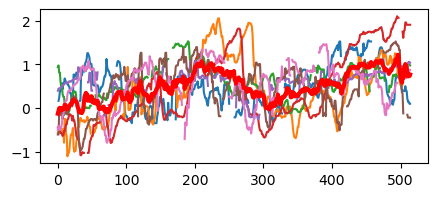

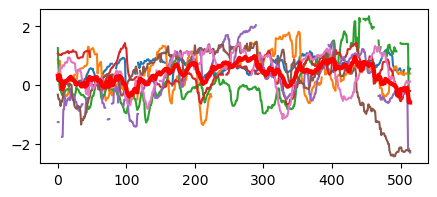

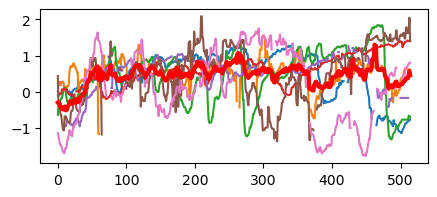

In [25]:
alld = []
for curr_video in range(30):

    zed = zscore(all_sub_videos_res[:,curr_video,:].T,nan_policy='omit')
    zed.shape

    plt.figure(figsize = (5,2))
    plt.plot(zed[250:,:]);
    mean_pupil = np.nanmean(zed, axis = 1)
    plt.plot(mean_pupil[250:], color='red', linewidth=3)
    
    alld.append(zed[250:,:])

In [68]:
rr = np.asarray(alld)
rr.shape

(30, 515, 7)

In [69]:
nrr = np.hstack(rr)

for i in range(nrr.shape[1]):
    nrr[:,i] = fill_nan(nrr[:,i])

In [72]:
nrr

array([[ 2.08531924,  0.95829857,  0.02024697, ..., -0.89040062,
         0.43572733, -1.13723276],
       [ 2.13611301,  0.95829857,  0.02024697, ..., -0.89571199,
        -0.40830051, -1.22053093],
       [ 2.13611301,  1.0261009 , -0.10123484, ..., -0.90102335,
        -0.36993561, -1.33159515],
       ...,
       [        nan,  0.37067831,  0.04049394, ...,         nan,
         1.62503928,  0.77862504],
       [        nan,  0.41587987,  0.04049394, ...,         nan,
         2.0470532 ,  0.77862504],
       [        nan,  0.41587987,  0.04049394, ...,         nan,
         1.39484987,  0.8063911 ]])

In [73]:
nrr.shape

(515, 210)

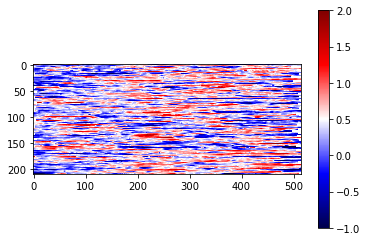

In [84]:
plt.imshow(nrr.T, cmap = 'seismic', vmin = -1. , vmax =2)
plt.colorbar()

In [91]:
import numpy as np
import numpy.ma as ma



ress = ma.corrcoef(ma.masked_invalid(nrr.T))

In [92]:
ress.shape

(210, 210)

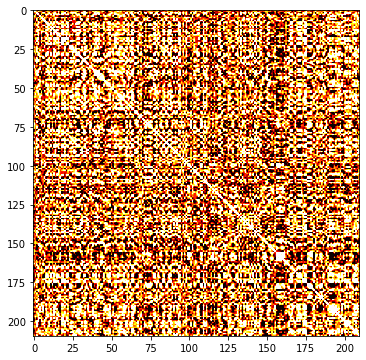

In [102]:
plt.figure(figsize = (6,6))
plt.imshow(ress, cmap = 'hot', vmin = -0.2, vmax = 0.2)

In [1]:
ls


00_VR_Video_ReadInData.ipynb* out.csv*


In [11]:
import os
for i in range(7,61):
    title = 'sub' + str(i).zfill(3)
    os.mkdir(title)